# 1. L1/L2 регуляризация 
-----
1. У нас есть данные ввиде множества пар $X$ и $y$: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$
2. Мы хотим найти такую функцию $\hat{f}(x)$ которая бы минимизировала 
$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 \rightarrow \text{min}_{\theta}
$$
3. Мы будем искать $\hat{f}(x)$ в предположении что это линейная функция:
$$
\hat{f}(x, \theta) = \theta_0 + x^{[1]}\theta_1 + x^{[2]}\theta_2 + \ldots + x^{[m]}\theta_m
$$

**Вопрос**:

Как запретить коэффициентам $\theta$ быть большими?

**Ответ**:

Возьмем и добавим их в оптимизируемую функцию, т.к. мы ищем минимиум этой функции то в процессе оптимизации 
они будут (по-крайней мере мы на это надеемся) уменьшаться:


$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| \rightarrow \text{min}
$$

$$
MSE_{l_2}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m \theta_j^2 \rightarrow \text{min}
$$


Обратите внимание что в сумме по тетта  индексация начинается с 1, а не с 0. Поскольку свободный коэффициент $\theta_0$ **нет смысла регуляризовывать** — если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения. 

Коэффициент $\alpha$ называется **параметром регуляризации** и контролирует баланс
между подгонкой под обучающую выборку и штрафом за излишнюю сложность, этот параметр **подбирается на кросс-валидации**.


-----

-----

Обе модели реализованы в sklearn в модуле linear_models:

sklearn.linear_models.Lasso $\rightarrow l_1$

sklearn.linear_models.Ridge $\rightarrow l_2$

Давайте посмотрим как это выглядит на практике

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

In [2]:
params = {
    'n_samples':10000,
    'n_features':40,
    'n_informative':10,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X, y, _coef = make_regression(**params)


# Загляните внутрь функции make_regression, что означает каждый параметр?
# курсор внутрь круглых скобок и нажать shift+TAB

In [3]:
np.shape(X)

(10000, 40)

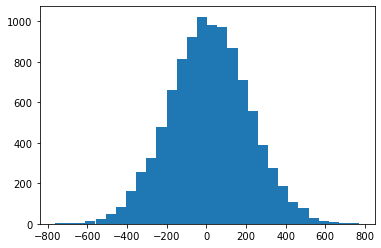

In [4]:
plt.hist(y, bins=30);

In [5]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )

Истинные коэффициенты модели:
 [ 0.     0.     0.     0.     0.    97.024  0.     0.     0.     0.
 21.463  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.    84.229  0.     0.    66.524  0.     0.     0.     0.     0.
 77.487 47.511  5.998  0.     0.    30.253 66.413  0.    78.231  0.   ]


## 2.1 Lasso регуляризация

1. Создайте класс Lasso с параметрами:
    - `alpha=50`
    - `fit-intercept=True`
    - `random_state=33`
2. Обучите модель Лассо регресии на данных X: `model.fit(X, y)`
3. Предскажите с помощью этой модели значения целевой переменной: `model.predict(X)`
4. Посчитайте MSE между предсказанным и истинным значением.
5. Напечатайте веса обученной линейной модели. Что вы можете о них сказать?
6. Используя параметр `alpha=15, 5, 2, 1, 0.3, 0.1, 0.03` обучите модель Lasso и посторойте зависимость **нормы** вектора весов $\theta$ от величины `alpha`.
7. Для различных значения `alpha` постройте распределение параметров `\theta`. Для этого измените параметры функции `make_regression` увеличив общее количество признаков `n_features`, количество "информативных" признаков `n_informative` и количество наблюдений `n_samples`.

Для выполнения пункта 7 и 8. напишите функцию которая принимает на вход параметр alpha, матрицу X, и вектор y, а возвразает вам вектор весов и MSE.

In [6]:
model_lasso = Lasso(alpha=50, fit_intercept=True, random_state=33)
model_lasso.fit(X, y)

Lasso(alpha=50, random_state=33)

In [7]:
model_lasso.predict(X)
np.linalg.norm(model_lasso.coef_)

72.63243952009381

In [8]:
alpha_arr = [15, 5, 2, 1, 0.3, 0.1, 0.03]
norm_theta = []
for alpha in alpha_arr:
    model_lasso = Lasso(alpha = alpha, fit_intercept=True, random_state=33)
    model_lasso.fit(X, y)
#     print(model_lasso.predict(X))
    norm_theta.append(np.linalg.norm(model_lasso.coef_, ord=1))

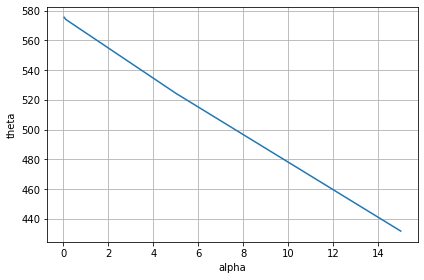

In [9]:
plt.figure(figsize=[6, 4])
plt.plot(alpha_arr, norm_theta)
plt.xlabel("alpha")
plt.ylabel("theta")
plt.tight_layout() 
plt.grid()

In [10]:
def get_weights_mse_lasso(alpha, X, y, fit_interc: bool = True):
    model = Lasso(alpha=alpha, fit_intercept=True, random_state=33)
    model.fit(X, y)
    model.predict(X)
    return model.coef_, np.square(np.subtract(_coef,model.coef_)).mean()

In [11]:
alpha = 0.03
info_features_options = range(1, 21)

In [12]:
def get_theta_hist(alpha, model_type):
    function = get_weights_mse_lasso if model_type == 'lasso' else get_weights_mse_ridge
    theta, mse = [], []
    for elem in info_features_options:
        params['n_informative'] = elem
        X, y, _coef = make_regression(**params)
        theta_elem, mse_elem = function(alpha, X, y)
        theta.append(theta_elem)
        mse.append(mse_elem)
    return theta

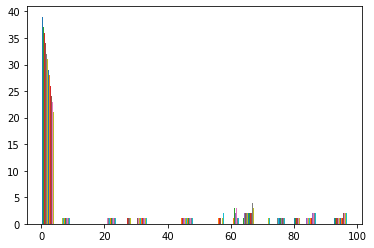

In [13]:
alpha = 0.01
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=20)
plt.show()

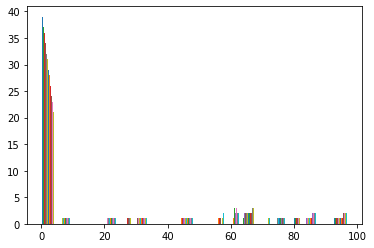

In [14]:
alpha = 0.03
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=20)
plt.show()

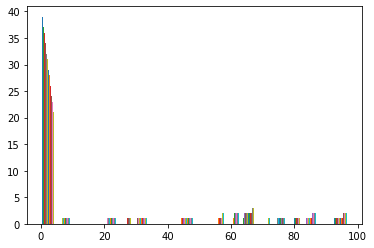

In [15]:
alpha = 0.1
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=20)
plt.show()

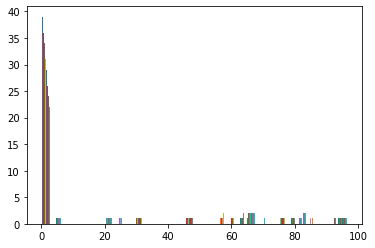

In [16]:
alpha = 0.5
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=30)
plt.show()

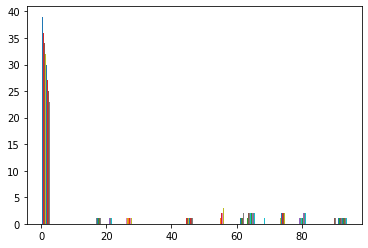

In [17]:
alpha = 3
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=30)
plt.show()

## 2.2 Ridge регуляризация

1. Тоже но для Ridge регрессии
2. Что вы можете сказать об отличиях между результатами Ridge и Lasso?

In [18]:
model = Ridge(alpha=50, fit_intercept=True, random_state=33)
model.fit(X, y)

Ridge(alpha=50, random_state=33)

In [19]:
model.predict(X)
np.linalg.norm(model.coef_)

201.80759929858226

In [20]:
alpha_arr = [15, 5, 2, 1, 0.3, 0.1, 0.03]
norm_theta = []
for alpha in alpha_arr:
    model_ridge = Ridge(alpha = alpha, fit_intercept=True, random_state=33)
    model_ridge.fit(X, y)
#     print(model_ridge.predict(X))
    norm_theta.append(np.linalg.norm(model_ridge.coef_, ord=2))
    

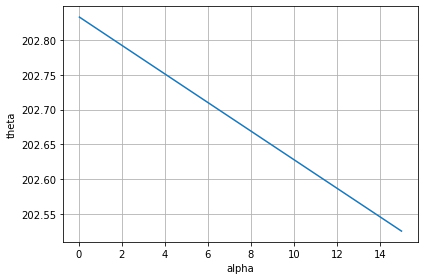

In [21]:
plt.figure(figsize=[6, 4])
plt.plot(alpha_arr, norm_theta)
plt.xlabel("alpha")
plt.ylabel("theta")
plt.tight_layout() 
plt.grid()

In [22]:
def get_weights_mse_ridge(alpha, X, y, fit_interc: bool = True):
    model = Ridge(alpha=alpha, fit_intercept=fit_interc, random_state=33)
    model.fit(X, y)
    model.predict(X)
    return model.coef_, np.square(np.subtract(_coef,model.coef_)).mean()

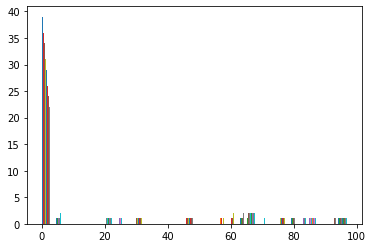

In [23]:
alpha = 0.01
plt.hist(get_theta_hist(alpha=alpha, model_type='ridge'), bins=30)
plt.show()

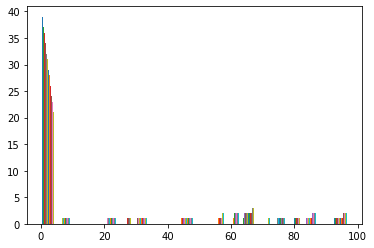

In [24]:
alpha = 0.1
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=20)
plt.show()

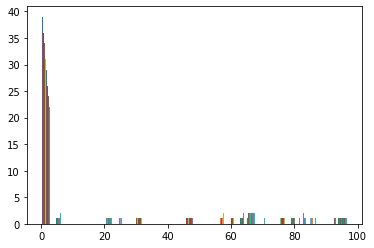

In [25]:
alpha = 0.3
plt.hist(get_theta_hist(alpha=alpha, model_type='lasso'), bins=30)
plt.show()

## 2.3 Давайте посмотрим что происходит с весами модели, в процессе обучения градиентным спуском Лассо регрессии

Что происходит со значениями $\theta$ в процессе обучения

In [26]:
sgd_params = {
    'loss':'squared_loss',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.05,
    'learning_rate':'constant',
}

In [27]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)

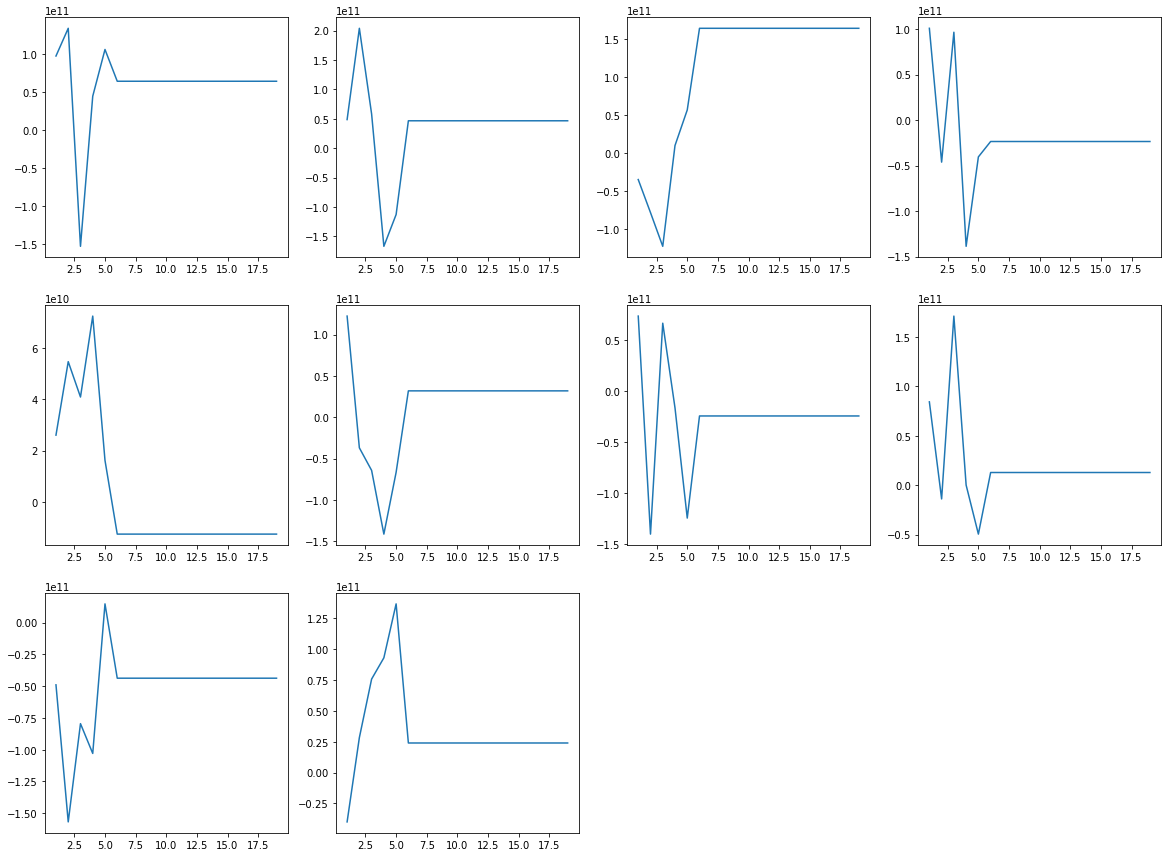

In [28]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.4 Сравните с поведением весов модели в случае Гребневой регрессии

In [29]:
sgd_params['penalty'] = 'l2'
sgd_params['l1_ratio'] = 0

In [30]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)

In [31]:
model.coef_

array([  29.75638694,  -11.24902625,  -35.33236478,   75.4573323 ,
        -62.22441356,   95.60457465,  -92.96182711,  -51.96559543,
          1.00222562,   34.8378733 ,   20.33556644,   80.03462795,
         39.88026732, -141.28435963,  -53.79587223,  -52.76656103,
        -92.58922841,   53.56896536,  -49.28684057,    5.65571943,
        -56.53868301,   -7.53585082,  102.34192082,   56.58613983,
         79.45826239,   49.64588838,  114.2222676 ,    1.54503182,
        -70.22512229,   47.86010706,   20.05255405,   -3.61025219,
        133.90367822,   52.41891024,  -58.87540913,   96.89565455,
         95.50589335,  -24.39924899,  130.53368262,  -67.27818154])

In [32]:
model.intercept_

array([69.82476223])

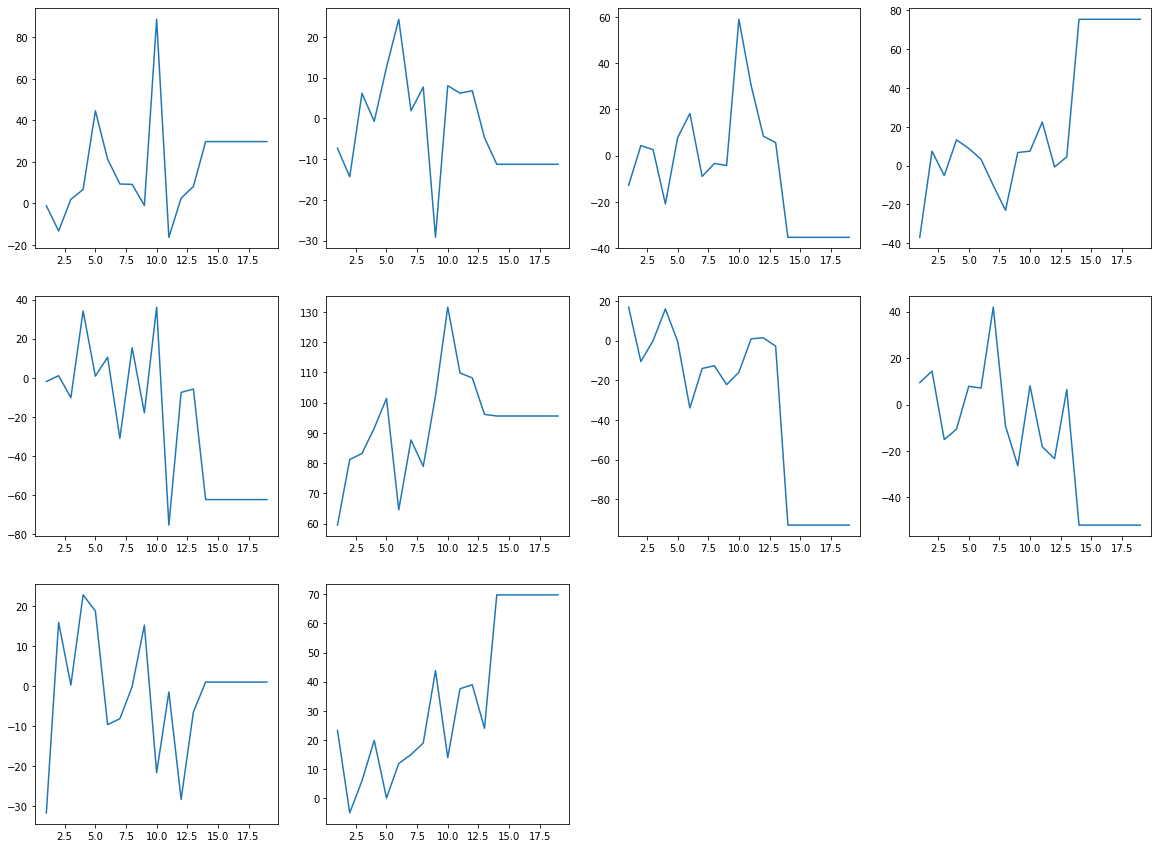

In [33]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

## 2.5 Elastic Net регуляризация

$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| +  \beta \sum_{j=1}^m \theta_j^2  \rightarrow \text{min}
$$

см. sklearn.linear_model.ElasticNet

сравните с поведением весов в случае Elastic Net

In [34]:
sgd_params = {
    'loss':'squared_loss',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.05,
    'learning_rate':'constant',
}

In [35]:
coef = []
intercept = []

for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = ElasticNet(alpha = 0.1)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
# print(coef)

In [36]:
print(model.intercept_)

10.180851717634898


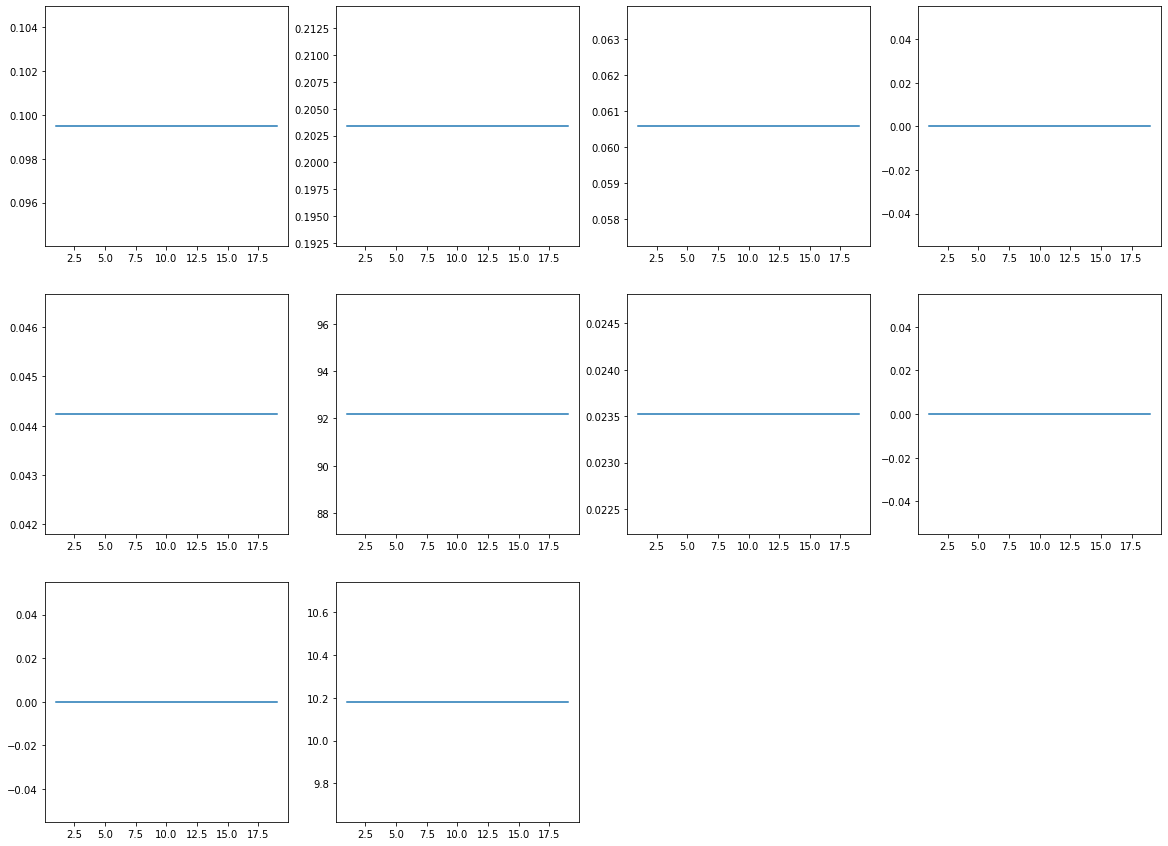

In [37]:
plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)

# 3. "Предсказание" числа в другой системе исчисления

Построим линейную модель которая переводит числа из *двоичной* системы исчисления в *десятичную*. Для этого сгенерируйте тренировочную выборку размера 10000 наблюдений, в которой в качестве признаков выступают бинарные векторы длины 32, а в качестве `y` значение в десятичной системе исчисления. Например:

- $x_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$, $y_1 = 0$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$, $y_2 = 525856$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]$, $y_3 = 3$


1. Обучите 3 линейные модели на **всех наблюдениях**: Линейная регрессия, Лассо регрессия, Гребневая регрессия (для всех моделей устновите параметр `fit_intercept=False`, что контролирует этот параметр?).
2. Сравните ошибку, например MSE для всех трех моделей.
3. Сравните коэффиценты обученных моделей, что вы можете о них сказать?
4. Разделите ваши данные на тренировочную и тестовую выборки, обучите модели на тренировочной части данных, сделайте предсказание на тестовой. Сравните коэффициенты обученных моделей, сравните качество (в терминах MSE) на тестовой и тренировочной выборках.
5. Объясните поведение Лассо и Гребневой регрессии.


In [38]:
twos = [2 ** (31 - i) for i in range(32)]

binary_vec = np.array([np.random.choice([0, 1], size=(32,), p=[1./2, 1./2]) for el in range(10000)])
values = [np.sum(twos * el) for el in binary_vec]

In [39]:
def fit_model_with_mse(model_type, alpha, X, y, fit_interception):
    model_type = Lasso if model_type == 'lasso' else (Ridge if model_type == 'ridge' else ElasticNet)
    model = model_type(alpha=alpha, fit_intercept=fit_interception, random_state=33)
    model.fit(X, y)
    model.predict(X)
    return [model, np.subtract(y,model.predict(X)).mean() / len(y)]

## MSE dependence on alpha - off-topic

In [40]:
alpha_arr = [15, 5, 2, 1, 0.3, 0.1, 0.03]
mse = []
for alpha in alpha_arr:
    mse.append(fit_model_with_mse('lasso', alpha, binary_vec, values, fit_interception=False)[1])
    

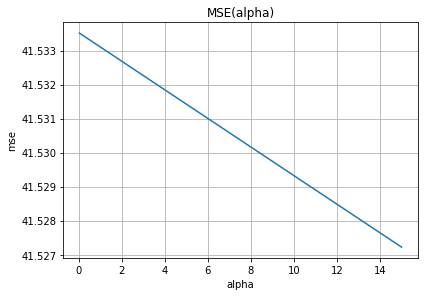

In [41]:
plt.figure(figsize=[6, 4])
plt.plot(alpha_arr, mse)
plt.xlabel("alpha")
plt.ylabel("mse")
plt.tight_layout() 
plt.title('MSE(alpha)')
plt.grid()

## Comparison between MSE of diff models

In [42]:
model_lasso, mse_lasso = fit_model_with_mse('lasso', 0.1, binary_vec, values, fit_interception=False)
model_ridge, mse_ridge = fit_model_with_mse('ridge', 0.1, binary_vec, values, fit_interception=False)
model_elastic_1, mse_elastic_1 = fit_model_with_mse('elastic', 0.1, binary_vec, values, fit_interception=False)
model_elastic_01, mse_elastic_01 = fit_model_with_mse('elastic', 0.01, binary_vec, values, fit_interception=False)

In [43]:
mse_lasso

41.53348231604959

In [44]:
mse_ridge

0.2677292642379131

In [45]:
mse_elastic_1

1325.5801332053982

In [46]:
mse_elastic_01

133.72484229798619

As we can see, they are quite different and Ridge has minimal MSE
But for ElasticNet alpha = 0.1 are bad(for example alpha = 0.01 -> MSE ~ 130)

## Coefficients of diff models

In [47]:
model_lasso.coef_

array([ 2.14854004e+09,  1.07478963e+09,  5.37942426e+08,  2.69527425e+08,
        1.35204769e+08,  6.79742477e+07,  3.42489091e+07,  1.72699833e+07,
        8.71189610e+06,  4.30467946e+06,  2.05148276e+06,  8.06818274e+05,
        3.06298445e+04, -4.54939156e+05, -6.77480705e+05, -8.17717150e+05,
       -1.04568734e+06, -1.13875502e+06, -1.08347352e+06, -1.01664832e+06,
       -9.74554066e+05, -8.22357066e+05, -7.43516533e+05, -5.63100339e+05,
       -4.35634078e+05, -1.61626924e+05, -3.41432878e+03,  2.38701642e+05,
        3.81929581e+05,  5.72713213e+05,  6.68599050e+05,  8.07029083e+05])

In [48]:
model_ridge.coef_

array([2.14740250e+09, 1.07370373e+09, 5.36854790e+08, 2.68429160e+08,
       1.34216291e+08, 6.71117879e+07, 3.35583373e+07, 1.67808576e+07,
       8.39391447e+06, 4.20020659e+06, 2.10214081e+06, 1.05218807e+06,
       5.28102393e+05, 2.70179033e+05, 1.37687208e+05, 7.09798423e+04,
       3.89823588e+04, 2.25850036e+04, 1.27544731e+04, 9.42938318e+03,
       6.13888149e+03, 5.70268401e+03, 4.99095847e+03, 3.97654689e+03,
       6.33493954e+03, 5.41588716e+03, 5.58243073e+03, 4.83732950e+03,
       6.10186265e+03, 4.93661423e+03, 5.00107852e+03, 7.30814689e+03])

In [49]:
model_elastic_1.coef_

array([1.80976316e+09, 9.15187434e+08, 4.69605964e+08, 2.42605133e+08,
       1.28886920e+08, 7.89027741e+07, 4.97262962e+07, 3.24354978e+07,
       3.01300484e+07, 2.80160237e+07, 2.28843137e+07, 1.70917146e+07,
       1.72741494e+07, 3.16236257e+07, 2.65397663e+07, 2.24492663e+07,
       2.50843133e+07, 2.50292238e+07, 1.93107606e+07, 2.20420731e+07,
       1.77343654e+07, 1.97879619e+07, 1.90406105e+07, 1.63395694e+07,
       2.50992271e+07, 2.20392336e+07, 2.27182106e+07, 2.02420379e+07,
       2.46087341e+07, 2.06114615e+07, 2.08664986e+07, 2.88746304e+07])

In [50]:
model_elastic_01.coef_

array([2.10771065e+09, 1.05506890e+09, 5.28966989e+08, 2.65355065e+08,
       1.33522506e+08, 6.85370825e+07, 3.54678989e+07, 1.85692601e+07,
       1.09850982e+07, 7.07734171e+06, 4.54302359e+06, 2.83328519e+06,
       2.40622529e+06, 4.17200477e+06, 3.35819219e+06, 2.73018450e+06,
       3.06771169e+06, 3.04505422e+06, 2.24903751e+06, 2.61634041e+06,
       2.01719651e+06, 2.29896517e+06, 2.20158690e+06, 1.83577954e+06,
       3.03264578e+06, 2.62024438e+06, 2.71544065e+06, 2.36591327e+06,
       2.97662868e+06, 2.41899156e+06, 2.45147123e+06, 3.56049637e+06])

In [51]:
np.array(twos)

array([2147483648, 1073741824,  536870912,  268435456,  134217728,
         67108864,   33554432,   16777216,    8388608,    4194304,
          2097152,    1048576,     524288,     262144,     131072,
            65536,      32768,      16384,       8192,       4096,
             2048,       1024,        512,        256,        128,
               64,         32,         16,          8,          4,
                2,          1])

As we see, some of coefficients (big ones) are simillar to degrees of 2 -> that means coefficients of different models are trying to become $2^{n}$